The Olist store is an e-commerce business headquartered in Sao Paulo, Brazil. This firm acts as a single point of contact between various small businesses and the customers who wish to buy their products. 

Objectve --
When we shop online, we often read reviews to help decide what to buy. These reviews are written by other customers who have already bought the product. Olist can use these reviews to make their store better. 
We try to determine the overall satisfaction of the customer with the product which he or she had just purchased. We can convert this aspect into a binary classification problem by treating the 4 and 5-star ratings as the positive class and the rest as the negative class.

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("../data/olist_customers_dataset.csv")
df.head(5)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score,review_comment_message
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,Deveriam embalar melhor o produto. A caixa vei...
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,5,"Só achei ela pequena pra seis xícaras ,mais é ..."


In [25]:
df.dtypes

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
payment_sequential                 int64
payment_type                      object
payment_installments               int64
payment_value                    float64
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
product_category_name             object
product_name_lenght              float64
product_descript

In [4]:
df.shape

(115609, 33)

In [27]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'review_score',
       'review_comment_message'],
      dtype='object')

In [2]:
# 1. Missing data
# Identifying how many datas are missing
null_values=df.isnull().sum()
print(null_values[null_values>0])

order_approved_at                   14
order_delivered_carrier_date      1195
order_delivered_customer_date     2400
product_weight_g                     1
product_length_cm                    1
product_height_cm                    1
product_width_cm                     1
review_comment_message           66703
dtype: int64


AS you're not analyzing time-based patterns, some of these columns less important.
order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date:

In [3]:
df["product_weight_g"].fillna(df["product_weight_g"].median(), inplace=True)
df["product_length_cm"].fillna(df["product_length_cm"].median(), inplace=True)
df["product_height_cm"].fillna(df["product_height_cm"].median(), inplace=True)
df["product_width_cm"].fillna(df["product_width_cm"].median(), inplace=True)
            # write "No review" in review_comment_message column
df["review_comment_message"].fillna("No review", inplace=True)

/tmp/ipykernel_3881/2838714127.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["product_weight_g"].fillna(df["product_weight_g"].median(), inplace=True)
/tmp/ipykernel_3881/2838714127.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

In [4]:
df['order_purchase_timestamp']

0         2017-10-02 10:56:33
1         2017-10-02 10:56:33
2         2017-10-02 10:56:33
3         2017-08-15 18:29:31
4         2017-08-02 18:24:47
                 ...         
115604    2018-08-03 21:35:53
115605    2018-07-23 18:35:14
115606    2018-07-23 18:35:14
115607    2017-01-26 11:09:00
115608    2017-09-17 16:51:43
Name: order_purchase_timestamp, Length: 115609, dtype: object

In [10]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['delivery_duration'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
df['delivery_duration']
# df['order_purchase_timestamp'] 

0          8.0
1          8.0
2          8.0
3          2.0
4          5.0
          ... 
115604     6.0
115605     3.0
115606     3.0
115607    19.0
115608    11.0
Name: delivery_duration, Length: 115609, dtype: float64

In [11]:

less_important_columns = [
    'order_id', 'customer_zip_code_prefix', 'order_status', 
    'order_purchase_timestamp', 'order_approved_at', 
    'order_delivered_carrier_date', 'order_delivered_customer_date', 
    'order_estimated_delivery_date', 'product_name_lenght', 
    'product_description_lenght', 'product_photos_qty', 
    
]

df=df.drop(columns=less_important_columns)
df.shape

(115609, 23)

In [9]:
cols_to_remove=[]

for column in df.columns:

	if df[column].nunique()<10 :
		cols_to_remove.append(column)

print(cols_to_remove)
# data_for_skewness=df.drop(cols_to_remove,axis=1)

['payment_type', 'review_score']


In [10]:
numeric_columns = df.select_dtypes(include=['number'])
numeric_columns

,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score
0,1,1,18.12,1,29.99,8.72,500.0,19.0,8.0,13.0,4
1,3,1,2.00,1,29.99,8.72,500.0,19.0,8.0,13.0,4
2,2,1,18.59,1,29.99,8.72,500.0,19.0,8.0,13.0,4
3,1,3,37.77,1,29.99,7.78,500.0,19.0,8.0,13.0,4
4,1,1,37.77,1,29.99,7.78,500.0,19.0,8.0,13.0,5
...,...,...,...,...,...,...,...,...,...,...,...
115604,1,1,33.69,1,25.00,8.69,350.0,32.0,2.0,28.0,5
115605,1,1,84.63,1,19.00,12.86,500.0,16.0,6.0,16.0,3
115606,1,1,84.63,2,39.90,12.87,500.0,21.0,7.0,14.0,3
115607,1,1,209.06,1,183.29,25.77,1225.0,27.0,35.0,15.0,4


In [11]:
# By identifying skewness, we can be more aware of the potential impact of outliers 
def identify_skewed_cols(df,cols):

	skewed_cols=[]
	for col in cols:
		skew=df[col].skew()
		if skew>1 or skew<-1:
			skewed_cols.append(col)
	return skewed_cols

skewed_cols=identify_skewed_cols(df,numeric_columns )
print(len(skewed_cols))

11


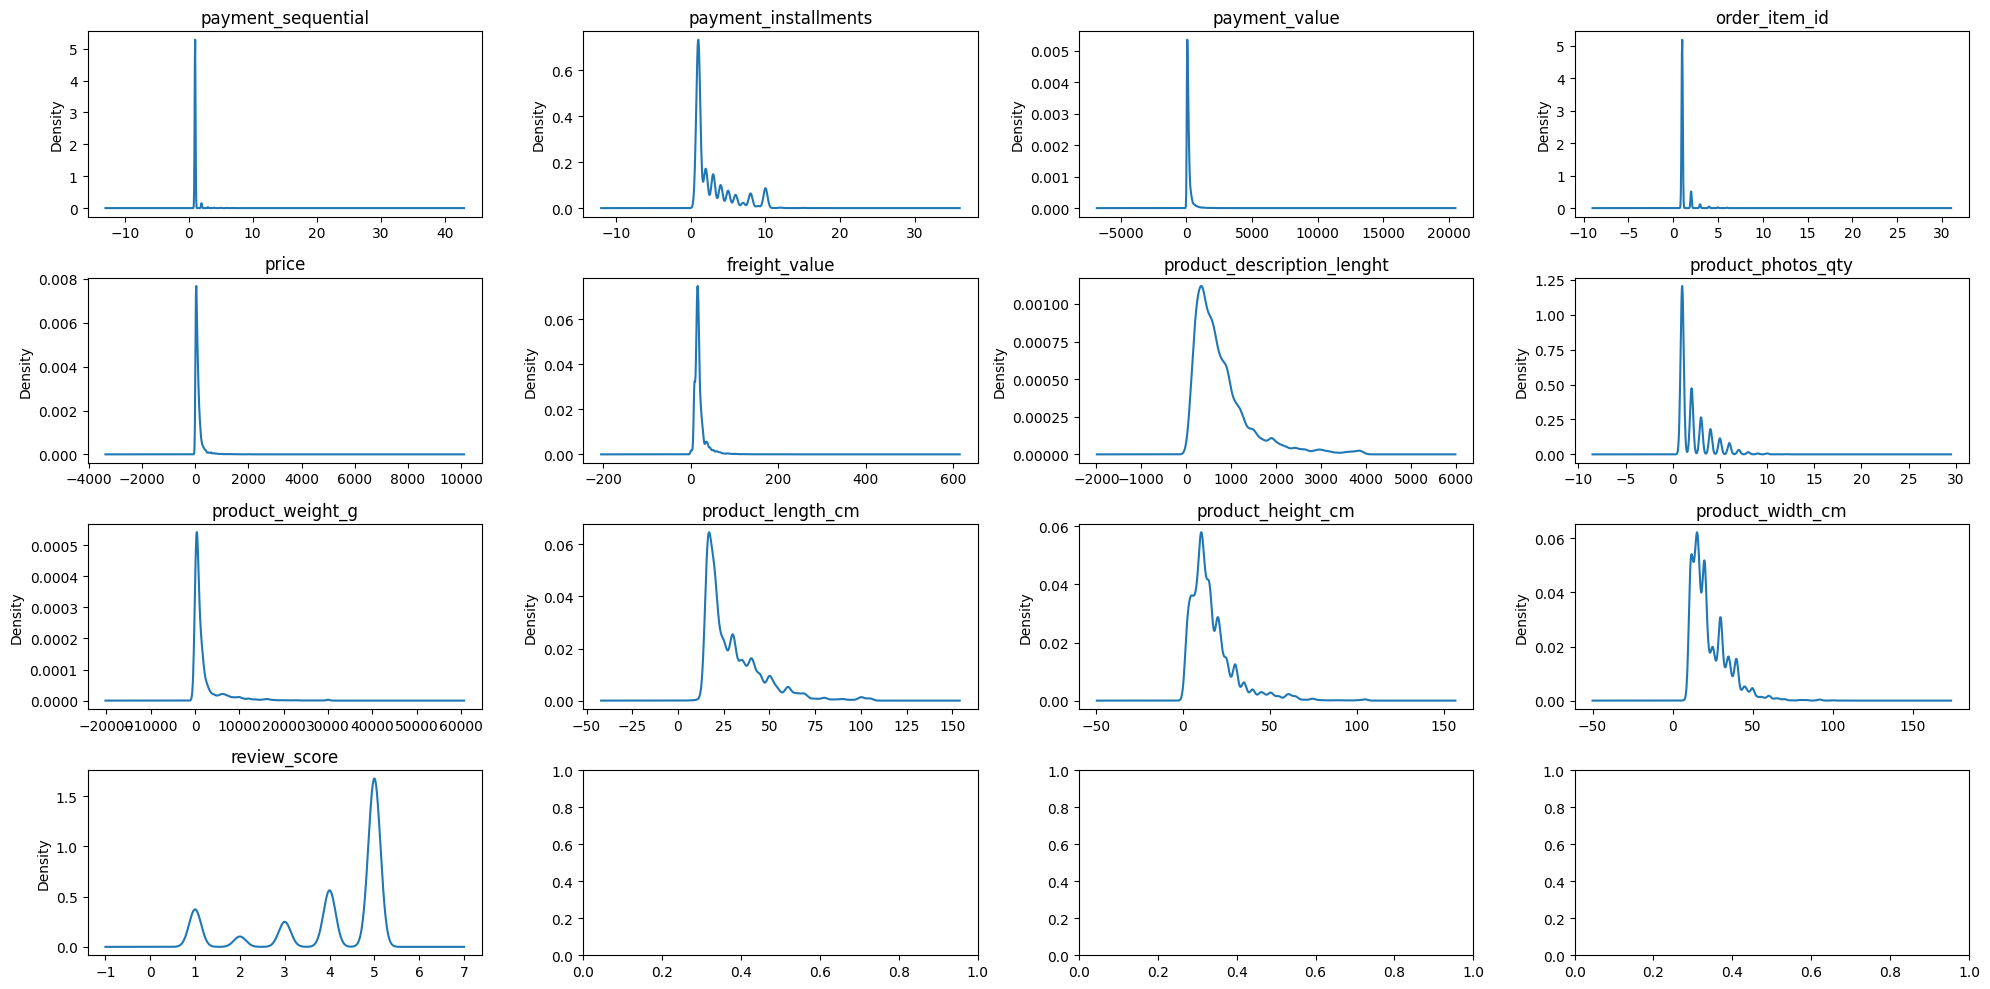

In [9]:
skewed_data=df[skewed_cols]
import matplotlib.pyplot as plt

fig, axes=plt.subplots(nrows=4,ncols=4,figsize=(20,10))
for i, col in enumerate(skewed_cols):
	axes[i//4,i%4].set_title(col)
	skewed_data[col].plot(kind='density',ax=axes[i//4,i%4],subplots=True)
plt.tight_layout()
plt.show()

In [12]:
# 2. Outlier
# Identifying the outliers

def deal_with_outliers_iqr(df,col):
	percentile25=df[col].quantile(0.25)
	percentile75=df[col].quantile(0.75)
	iqr=percentile75 - percentile25

	upper_limit=percentile75 + 1.5*iqr
	lower_limit=percentile25 - 1.5*iqr
	outliers=df[(df[col]>upper_limit) | (df[col]<lower_limit)]
	return outliers

cols_have_outliers_skewed=[]   

for col in skewed_cols:
	outliers=deal_with_outliers_iqr(df,col)  

	shape=outliers.shape

	if shape[0]>0:
		cols_have_outliers_skewed.append(col)

(cols_have_outliers_skewed)


['payment_sequential',
 'payment_installments',
 'payment_value',
 'order_item_id',
 'price',
 'freight_value',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'review_score']

In [12]:
def deal_with_outliers_iqr(df, col):
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    iqr = percentile75 - percentile25

    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    
    # Filter out the outliers
    df_filtered = df[(df[col] <= upper_limit) & (df[col] >= lower_limit)]
    
    return df_filtered

# List to store columns that have outliers
cols_have_outliers_skewed = []

# Iterate through skewed columns and remove outliers
for col in skewed_cols:
    df = deal_with_outliers_iqr(df, col)
    shape = df.shape

   
print(df.shape)



(54140, 22)


In [13]:
def remove_outliers(df, columns):
    for col in columns:
        # Calculate the first and third quartile
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        
        # Calculate the IQR
        IQR = Q3 - Q1
        
        # Define the upper and lower bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out outliers for the current column
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Define the columns to remove outliers from
columns_to_clean = ['product_length_cm', 'product_height_cm', 'product_width_cm']

# Apply the function
df = remove_outliers(df, columns_to_clean)



In [4]:
print(df["product_category_name_english"])

0                    housewares
1                    housewares
2                    housewares
3                    housewares
4                    housewares
                  ...          
115604    arts_and_craftmanship
115605    arts_and_craftmanship
115606    arts_and_craftmanship
115607    security_and_services
115608    security_and_services
Name: product_category_name_english, Length: 115609, dtype: object


In [5]:
category_counts = df['product_category_name_english'].value_counts()
top_categories = category_counts.head(10).reset_index()


top_categories.columns = ['product_category_name_english', 'count']
top_categories

,product_category_name_english,count
0,bed_bath_table,11847
1,health_beauty,9944
2,sports_leisure,8942
3,furniture_decor,8743
4,computers_accessories,8105
5,housewares,7331
6,watches_gifts,6161
7,telephony,4692
8,garden_tools,4558
9,auto,4356


In [18]:
pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


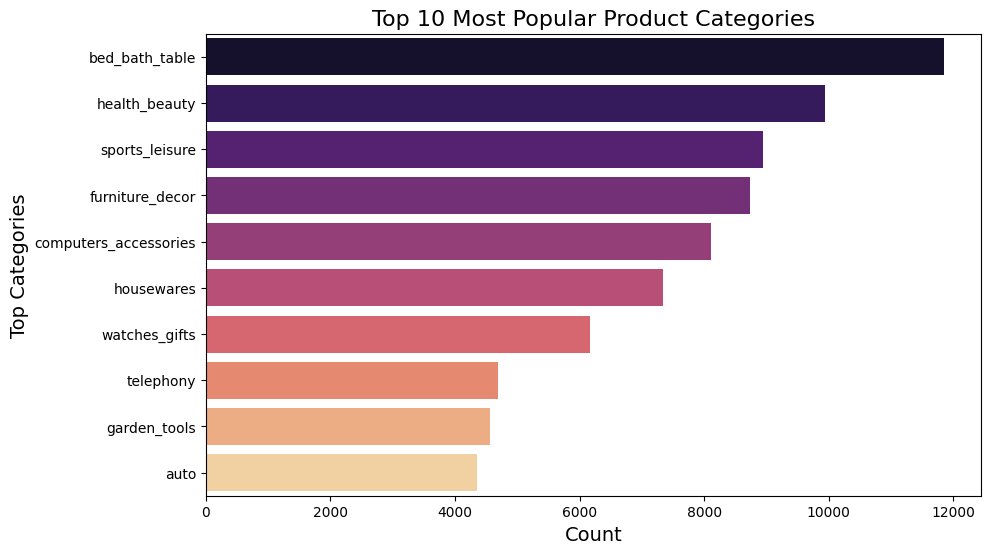

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_categories, 
    y='product_category_name_english', 
    x='count', 
    palette='magma', 
    hue='product_category_name_english', 
    dodge=False, 
    legend=False
)
plt.title('Top 10 Most Popular Product Categories', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Top Categories', fontsize=14)
plt.show()

In above chart We are now finding the top 10 most popular product categories in terms of the frequency of purchase. The category ‘bed bath table’ is significantly more popular than most of the other categories. It is the only category whose sales have crossed 10000 units. 

the business might consider expanding this line, offering discounts,

In [18]:
print(df['payment_value'])

0          18.12
1           2.00
2          18.59
3          37.77
4          37.77
           ...  
115604     33.69
115605     84.63
115606     84.63
115607    209.06
115608    115.45
Name: payment_value, Length: 115609, dtype: float64


In [22]:
print(df['customer_city'])

0              sao paulo
1              sao paulo
2              sao paulo
3              sao paulo
4              sao paulo
               ...      
115604    belo horizonte
115605           diadema
115606           diadema
115607    rolim de moura
115608          brasilia
Name: customer_city, Length: 115609, dtype: object


AttributeError: 'NoneType' object has no attribute 'unique'

We are now finding the city which generates the highest revenue

In [30]:
city_revenue = df.groupby('customer_city')['payment_value'].sum()

top_cities= city_revenue.head(20).sort_values(ascending=False).reset_index()


top_cities.columns = ['customer_city', 'payment_value']
top_cities

,customer_city,payment_value
0,abaetetuba,6237.78
1,abreu e lima,5044.97
2,abaete,1896.54
3,acarau,1366.46
4,acailandia,1233.48
5,acopiara,1050.43
6,abadiania,1025.52
7,abelardo luz,797.58
8,abrantes,761.36
9,abadia dos dourados,413.50


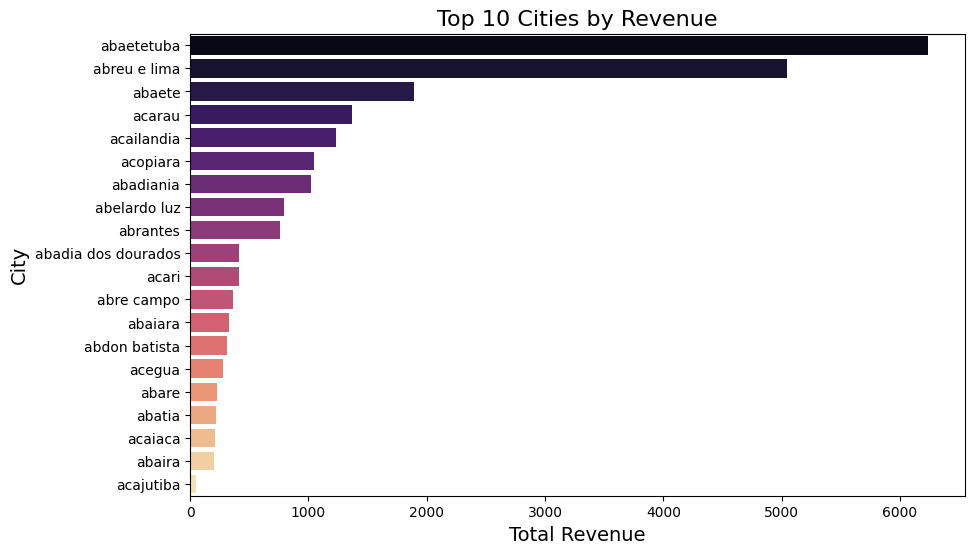

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_cities,
    
    y='customer_city', 
    x='payment_value', 
    palette='magma', 
    hue='customer_city', 
    dodge=False, 
    legend=False
)
plt.title('Top 10 Cities by Revenue', fontsize=16)
plt.xlabel('Total Revenue', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.show()

In [37]:

total_payment_value = df.groupby('product_category_name_english')['payment_value'].sum()


category_counts = df['product_category_name_english'].value_counts()


total_payment_value_df = total_payment_value.reset_index()
total_payment_value_df.columns = ['product_category_name_english', 'total_payment_value']

category_counts_df = category_counts.reset_index()
category_counts_df.columns = ['product_category_name_english', 'count']

# Merge the total payment value and count DataFrames
merged_df = pd.merge(total_payment_value_df, category_counts_df, on='product_category_name_english')

# Calculate the average order value
merged_df['average_order_value'] = merged_df['total_payment_value'] / merged_df['count']
merged_df.sort_values(by='average_order_value', ascending=False).head(10)

,product_category_name_english,total_payment_value,count,average_order_value
14,computers,270046.41,217,1244.453502
34,fixed_telephony,206404.01,269,767.301152
64,small_appliances_home_oven_and_coffee,51229.32,78,656.786154
0,agro_industry_and_commerce,118730.61,252,471.153214
45,home_appliances_2,124423.64,268,464.267313
57,office_furniture,645927.93,1773,364.313553
62,signaling_and_security,68289.47,199,343.163166
19,construction_tools_safety,65646.80,198,331.549495
56,musical_instruments,230408.31,712,323.607177
63,small_appliances,224551.25,699,321.246423


The computers category has the highest AOV  (AVERAGE ORDER VALUE) which indicates customers are spending more on average in purchasing items from this category though from our previous analysis we discovered that bed_bath_table category is the most purchased category.
This means customers purchase more bed_bath_table items, but spend more money on items from the computers category. More marketing resources need to be allocated to low AOV categories to drive more traffic and encourage higher spending through discount offers.

In [36]:
numeric_cols= ['payment_sequential', 'payment_installments', 'payment_value',
       'order_item_id', 'price', 'freight_value', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm']

print(numeric_cols)

['payment_sequential', 'payment_installments', 'payment_value', 'order_item_id', 'price', 'freight_value', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']


In [7]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols

Index(['customer_id', 'payment_type', 'customer_unique_id', 'customer_city',
       'customer_state', 'product_id', 'seller_id', 'shipping_limit_date',
       'product_category_name', 'product_category_name_english',
       'review_comment_message'],
      dtype='object')

In [12]:
# categorical_cols = df.select_dtypes(include=['object', 'category']).columns
# categorical_cols
df=df.drop(columns=['customer_id', 'customer_unique_id', 'customer_city',
       'customer_state', 'product_id', 'seller_id', 'shipping_limit_date',
        'product_category_name_english',
       'review_comment_message'])
df.shape


(115609, 14)

In [14]:

from sklearn.compose  import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
numeric_cols= ['payment_sequential', 'payment_installments', 'payment_value',
       'order_item_id', 'price', 'freight_value', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm']


cat_cols=df.select_dtypes(include=['object']).columns

numeric_pipeline=Pipeline(
    steps=[
                    ("imputer", SimpleImputer(strategy="most_frequent")),
                    ("scaler",StandardScaler(with_mean=False))

                ]

)

cat_pipeline=Pipeline(
                steps=[
                    ("imputer", SimpleImputer(strategy="most_frequent")),
                    ("one_hot_encoder",OneHotEncoder(handle_unknown='ignore')),
                    ("scaler",StandardScaler(with_mean=False))

                ]
            )

preprocessed_data=ColumnTransformer(
                transformers=[
                ("cat_pipelines",cat_pipeline,cat_cols),
                ("num_pipeline",numeric_pipeline,numeric_cols)

            ])
preprocessed_data

ColumnTransformer(transformers=[('cat_pipelines',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore')),
                                                 ('scaler',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['payment_type', 'product_category_name'], dtype='object')),
                                ('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('scaler',
                                                  StandardScaler(with_mean=False))]),
                                 ['payment_sequential', 'payment_installments',
                                  'payment_value', 'order_item_id', 'price',
                                  'freight_value', 'product_weight_g',
                                  'product_length_cm', 'product_height_cm',
                                  'product_width_cm'])])

In [15]:
X = df.drop(columns=['review_score'], axis=1)
Y=(df["review_score"])
           
X_train,X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=42)

X_train_arr=preprocessed_data.fit_transform(X_train)
# print(X_train_arr)
X_test_arr=preprocessed_data.transform(X_test)
print(X_test_arr)

  (0, 1)	2.2712401850499315
  (0, 68)	4.226638466214145
  (0, 75)	1.5359179906516662
  (0, 76)	1.1144076528389286
  (0, 77)	0.9723579746968709
  (0, 78)	1.4731881383951368
  (0, 79)	1.3503910302842785
  (0, 80)	1.8000752600235765
  (0, 81)	0.15777951106691693
  (0, 82)	1.5035560695919914
  (0, 83)	1.5926242945466316
  (0, 84)	1.6305441835327188
  (1, 1)	2.2712401850499315
  (1, 68)	4.226638466214145
  (1, 75)	1.5359179906516662
  (1, 76)	0.3714692176129762
  (1, 77)	3.7191093594181086
  (1, 78)	4.419564415185411
  (1, 79)	1.0433444113019505
  (1, 80)	1.215697448094688
  (1, 81)	0.269424662172747
  (1, 82)	1.3364942840817702
  (1, 83)	1.3476051723086884
  (1, 84)	1.4131382923950229
  (2, 1)	2.2712401850499315
  :	:
  (20533, 84)	2.500167748083502
  (20534, 1)	2.2712401850499315
  (20534, 15)	3.4105447002351648
  (20534, 75)	1.5359179906516662
  (20534, 76)	2.2288153056778572
  (20534, 77)	0.2698436978671948
  (20534, 78)	1.4731881383951368
  (20534, 79)	0.31318755136197457
  (20534, 80)

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

tree_model = DecisionTreeRegressor(criterion='squared_error', max_depth=3, random_state=0)
tree_model.fit(X_train_arr, Y_train)

# Make predictions
Y_pred_tree = tree_model.predict(X_test_arr)

# Evaluate the model
mse_tree = mean_squared_error(Y_test, Y_pred_tree)
r2_tree = r2_score(Y_test, Y_pred_tree)

print(f"Mean Squared Error (Decision Tree): {mse_tree}")
print(f"R^2 Score (Decision Tree): {r2_tree}")

Mean Squared Error (Decision Tree): 1.8440318094905093
R^2 Score (Decision Tree): 0.021916746574277668


In [17]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train_arr, Y_train)

# Make predictions
Y_pred = linear_model.predict(X_test_arr)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error (Linear Regression): {mse}")
print(f"R^2 Score (Linear Regression): {r2}")

Mean Squared Error (Linear Regression): 1.8371540782357463
R^2 Score (Linear Regression): 0.02556472798502407


In [18]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()
ridge_model.fit(X_train_arr, Y_train)

# Make predictions
Y_pred_ridge = ridge_model.predict(X_test_arr)

# Evaluate the model
mse_ridge = mean_squared_error(Y_test, Y_pred_ridge)
r2_ridge = r2_score(Y_test, Y_pred_ridge)

print(f"Mean Squared Error (Ridge): {mse_ridge}")
print(f"R^2 Score (Ridge): {r2_ridge}")

Mean Squared Error (Ridge): 1.8371545798550997
R^2 Score (Ridge): 0.025564461923730297


In [15]:
from sklearn.linear_model import Lasso

# Create and train the Lasso regression model
lasso_model = Lasso(alpha=0.0009)
lasso_model.fit(X_train_arr, Y_train)

# Make predictions
Y_pred_lasso = lasso_model.predict(X_test_arr)

# Evaluate the model
mse_lasso = mean_squared_error(Y_test, Y_pred_lasso)
r2_lasso = r2_score(Y_test, Y_pred_lasso)

print(f"Mean Squared Error (Lasso): {mse_lasso}")
print(f"R^2 Score (Lasso): {r2_lasso}")

Mean Squared Error (Lasso): 0.0513746876065496
R^2 Score (Lasso): 0.02558634238767976


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Instantiate the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train_arr, Y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test_arr)
# Evaluate the model
mse_rf = mean_squared_error(Y_test, y_pred_rf)
r2_rf = r2_score(Y_test, y_pred_rf)

print(f"Mean Squared Error (Random Forest): {mse_rf}")
print(f"R^2 Score (Random Forest): {r2_rf}")



KeyboardInterrupt: 

In [16]:

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_arr, Y_train)
svc_preds = svc.predict(X_test_arr)

svc_r2 = r2_score(Y_test, svc_preds)
svc_mse = mean_squared_error(Y_test, svc_preds)
print("\nSVM R² Score:", svc_r2)
print("SVM MSE:", svc_mse)
